# import Library

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
## This statement allows the visuals to render within your Jupyter Notebook.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import plotly.express as px
from sklearn.linear_model import LogisticRegression
#from ydata_profiling import ProfileReport
%matplotlib inline

### 1- is The data Reliable : Yes it is because is from the larget website for transfor market https://www.transfermarkt.com/

### 2- is The data Timeliness : No it is from 2 season 2021-2022 and 2022-2023 

### 3- is The data Consistency : Yes

In [47]:
# read The Csv file as DataFream
df_ball = pd.read_csv("final_data.csv")
df_ball.head(5)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [48]:
# Explor data using ydata libaray
#ProfileReport(df_ball, title="Profiling Report")

# Preprocess the Data
## 1. Simple EDA + Data Quality checking

In [49]:
df_ball["clean sheets"]

0        0.335463
1        0.207055
2        0.924658
3        0.000000
4        0.000000
           ...   
10749    0.000000
10750    0.000000
10751    0.000000
10752    0.000000
10753    0.000000
Name: clean sheets, Length: 10754, dtype: float64

In [50]:
df_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [51]:
# Check if there is duplicated values
df_ball.duplicated().value_counts()

False    10754
Name: count, dtype: int64

In [52]:
# Check if there is null values
df_ball.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [53]:
# check if we can encode teams
check_teams = df_ball["team"].value_counts()

check_teams[check_teams < 25]

team
Sevilla FC                     24
Real Valladolid CF             24
Bristol City                   24
RCD Mallorca                   24
CA Colon                       24
Manchester City                24
Real Madrid                    24
Club Necaxa                    24
Club Atlético Tucumán          24
CA Vélez Sarsfield             24
CF Monterrey                   24
CA Independiente               24
PSV Eindhoven                  24
UNAM Pumas                     24
Leeds United                   24
Sparta Rotterdam               24
Deportivo Toluca               24
Twente Enschede FC             24
Fulham FC                      24
Central Coast Mariners         24
FK Rostov                      24
Preston North End              24
Stoke City                     24
Rio Ave FC                     24
Aston Villa                    23
Arsenal FC                     23
Sydney FC                      23
Wellington Phoenix             23
Zenit St. Petersburg           23
Villarrea

# some personl Q (:

In [54]:
df_top10 =df_ball.sort_values(by="highest_value" , ascending=False).head(10)
fig= px.bar(df_top10 , x="name", y = "highest_value",width=1000,height=700)
fig

In [55]:
df_top10 =df_ball.sort_values(by="award" , ascending=False).head(10)
fig= px.bar(df_top10 , x="name", y = "award",width=1000,height=700)
fig

In [56]:
df_postions =df_ball["position"].value_counts()
fig = px.pie(df_postions , names=df_postions.index , values= df_postions.values)
fig

In [57]:
# Remove Columns That we will not Use it 
df_ball = df_ball.drop(columns=["player","name"], axis=1)

In [58]:
df_ball.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'position_encoded',
       'winger'],
      dtype='object')

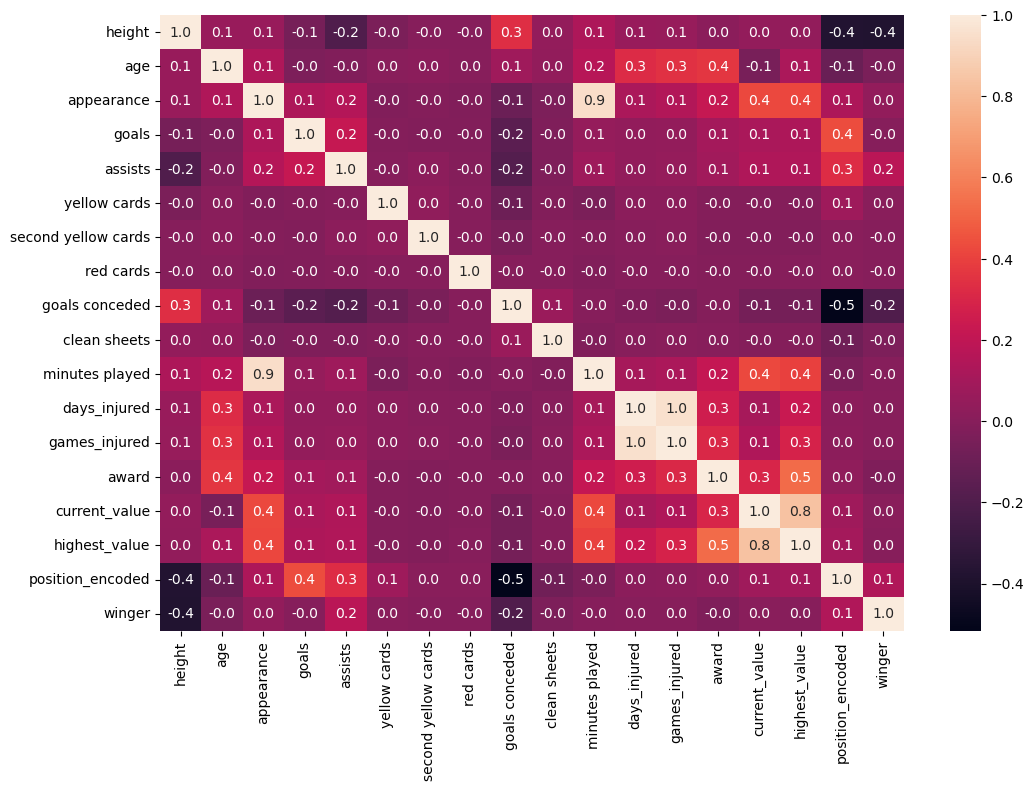

In [59]:
# find the corrlation bettween columns
corr = df_ball.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr,annot=True,fmt=".1f")
plt.show()

# Scatter plot for some relations

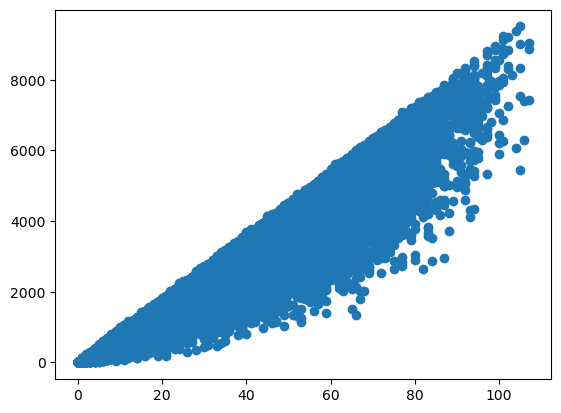

In [60]:
# check corrlation between appearance and miuntes played
plt.scatter(df_ball["appearance"],df_ball["minutes played"])
plt.show()

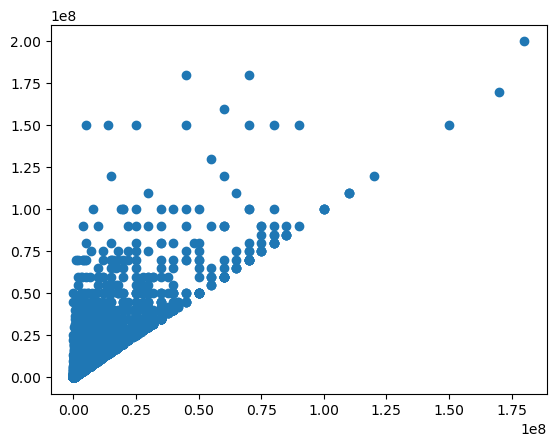

In [61]:
plt.scatter(df_ball["current_value"],df_ball["highest_value"])
plt.show()

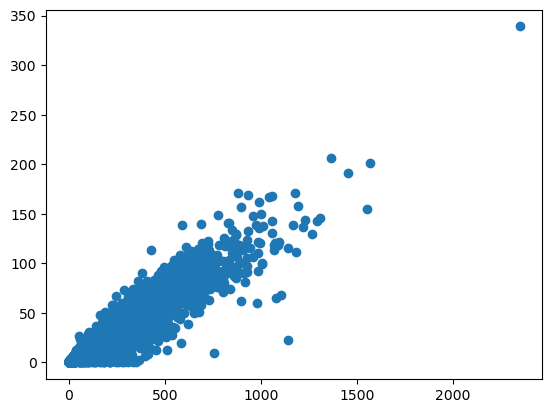

In [62]:
plt.scatter(df_ball["days_injured"],df_ball["games_injured"])
plt.show()

# Remove Outlier

(10587, 20)

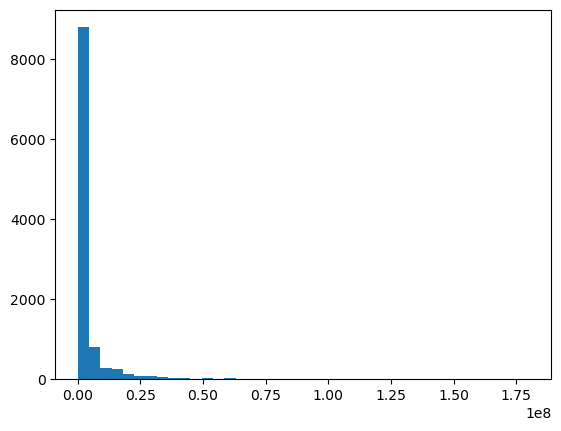

In [63]:
# cut the values the above 15m 
df_ball = df_ball[df_ball["current_value"] > 0]
plt.hist(df_ball["current_value"],bins=40)
df_ball.shape

(10582, 20)

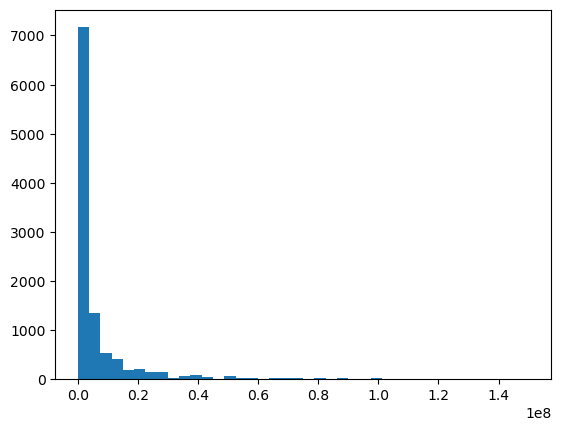

In [64]:
df_ball= df_ball[df_ball["highest_value"] <= 150000000]
plt.hist(df_ball["highest_value"],  bins=40)
df_ball.shape

In [65]:
df_ball.shape

(10582, 20)

####  Feature engineering

In [66]:
# one hot coding
categorical_features = ["position","team"]
df_ball = pd.get_dummies(df_ball, columns=categorical_features)

In [67]:
df_ball.shape

(10582, 408)

In [68]:
# Calculate the 35th and 75th percentiles of the price
p25 = df_ball["current_value"].quantile(0.25)
p75 = df_ball["current_value"].quantile(0.75)

# Our function to change the Valuse to categorys
def cat_value(current_value):
    if current_value < p25:
        return("Low priced Player")
    elif current_value < p75:
        return ("Middle priced Player")
    else:
        return("high priced player")
# define our new column
df_ball["Value_Category"] = df_ball["current_value"].apply(cat_value)

# drop current_value column 
df_ball.drop("current_value", axis=1 , inplace=True)

df_ball


,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,team_Western Sydney Wanderers,team_Western United FC,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor,Value_Category
0,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,0.000000,1.217252,0.335463,...,False,False,False,False,False,False,False,False,False,high priced player
1,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,...,False,False,False,False,False,False,False,False,False,Middle priced Player
2,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.616438,0.924658,...,False,False,False,False,False,False,False,False,False,Middle priced Player
3,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,high priced player
4,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,0.000000,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,high priced player
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,...,True,False,False,False,False,False,False,False,False,Low priced Player
10750,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,...,True,False,False,False,False,False,False,False,False,Middle priced Player
10751,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,...,True,False,False,False,False,False,False,False,False,Low priced Player
10752,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,...,True,False,False,False,False,False,False,False,False,Low priced Player


In [69]:
encoder = LabelEncoder()
df_ball["Value_Category"] = encoder.fit_transform(df_ball["Value_Category"])  

In [70]:
df_ball["Value_Category"]

0        2
1        1
2        1
3        2
4        2
        ..
10749    0
10750    1
10751    0
10752    0
10753    0
Name: Value_Category, Length: 10582, dtype: int32

####  Feature selection

In [71]:
corr = df_ball.corr(numeric_only=True)
corr["Value_Category"].sort_values(ascending=False)

Value_Category             1.000000
appearance                 0.538560
minutes played             0.508975
highest_value              0.489423
award                      0.242626
                             ...   
team_Marumo Gallants FC   -0.076466
position_Attack           -0.092244
position_midfield         -0.106111
goals conceded            -0.133409
position_Goalkeeper       -0.180303
Name: Value_Category, Length: 408, dtype: float64

In [72]:
threshold = 0.10 # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = corr[abs(corr['Value_Category']) > threshold]['Value_Category'].index
selected_features

Index(['appearance', 'goals', 'assists', 'goals conceded', 'minutes played',
       'days_injured', 'games_injured', 'award', 'highest_value',
       'position_encoded', 'position_Goalkeeper', 'position_midfield',
       'Value_Category'],
      dtype='object')

In [73]:
# select the columns that have corr with our target 
df_ball_1 = df_ball[selected_features]
df_ball_1.head()

,appearance,goals,assists,goals conceded,minutes played,days_injured,games_injured,award,highest_value,position_encoded,position_Goalkeeper,position_midfield,Value_Category
0,104,0.000000,0.000000,1.217252,9390,42,5,13,70000000,1,True,False,2
1,15,0.000000,0.000000,1.242331,1304,510,58,1,22000000,1,True,False,1
2,4,0.000000,0.000000,0.616438,292,697,84,4,6000000,1,True,False,1
3,82,0.028090,0.056180,0.000000,6408,175,22,9,50000000,2,False,False,2
4,63,0.017889,0.017889,0.000000,5031,238,51,21,80000000,2,False,False,2


In [74]:
# drop this columns because they have corrlation with other indeependent varible
df_ball_1.drop(columns=["appearance","days_injured"],axis=1,inplace=True)

C:\Users\mxd10\AppData\Local\Temp\ipykernel_12860\2808414621.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
df_ball_1.head()

,goals,assists,goals conceded,minutes played,games_injured,award,highest_value,position_encoded,position_Goalkeeper,position_midfield,Value_Category
0,0.000000,0.000000,1.217252,9390,5,13,70000000,1,True,False,2
1,0.000000,0.000000,1.242331,1304,58,1,22000000,1,True,False,1
2,0.000000,0.000000,0.616438,292,84,4,6000000,1,True,False,1
3,0.028090,0.056180,0.000000,6408,22,9,50000000,2,False,False,2
4,0.017889,0.017889,0.000000,5031,51,21,80000000,2,False,False,2


# Traing Step

In [76]:
x = df_ball_1.drop(['Value_Category'], axis=1)
y = df_ball_1['Value_Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.15,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
X_train_scaled.shape

(8994, 10)

In [78]:
X_test_scaled.shape

(1588, 10)

## Buliding the Models


In [79]:
model = LogisticRegression()

## Train The model

In [80]:
model.fit(X_train_scaled,y_train)

LogisticRegression()

## Test The Model

In [81]:
y_pred = model.predict(X_test_scaled) # Linear regression model

### Interpretation of the Model

In [82]:
coeff_df = pd.DataFrame(model.coef_[2],x.columns,columns=['Coefficient']) # Linear model cofficients
coeff_df

,Coefficient
goals,0.069452
assists,0.083348
goals conceded,-0.226905
minutes played,0.637911
games_injured,-0.167893
award,-0.456050
highest_value,6.088746
position_encoded,-0.006098
position_Goalkeeper,0.008136
position_midfield,-0.248685


In [83]:
print(f" Linear regression intercept: {model.intercept_}") 

 Linear regression intercept: [-3.20305831  2.01914927  1.18390904]


## Evaluating the Model

In [84]:
# our benchmark model
base_model = round(df_ball_1["Value_Category"].value_counts()[1]/df_ball_1.shape[0]*100, 2)
base_model

51.83

In [85]:
# Use accuracy_score function to show accuracy on test Data
accurcay = accuracy_score(y_test,y_pred)
round(accurcay,2)

0.76

In [86]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
round(accurcay,2)

0.76

In [87]:
# use confusion matrix function to show our predicted label and the true label
conf = confusion_matrix(y_test , y_pred)
conf

array([[228, 131,   0],
       [ 68, 708,  40],
       [  0, 146, 267]], dtype=int64)

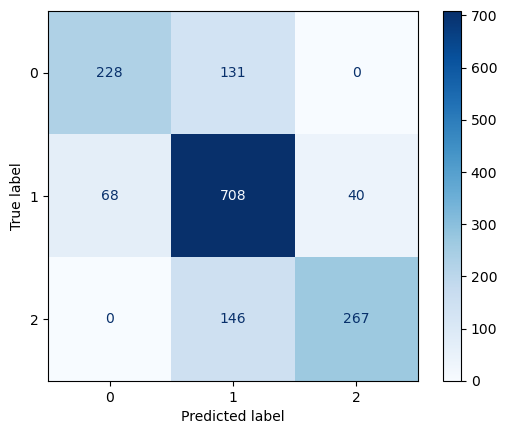

In [88]:
# show our confusion matrix in chart(heatmap)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred , display_labels=model.classes_, cmap="Blues")
plt.show()

In [89]:
# using classification report to Show Metrics (precision , recall , f1-score and accuracy)
from sklearn.metrics import classification_report
print('Train report: ')
print(classification_report(y_train, y_pred_train))

print("------------------------------------------------------")
 
print('\n Test report: ')
print(classification_report(y_test, y_pred))

Train report: 
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      2053
           1       0.72      0.86      0.78      4669
           2       0.85      0.63      0.73      2272

    accuracy                           0.75      8994
   macro avg       0.77      0.71      0.73      8994
weighted avg       0.76      0.75      0.75      8994

------------------------------------------------------

 Test report: 
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       359
           1       0.72      0.87      0.79       816
           2       0.87      0.65      0.74       413

    accuracy                           0.76      1588
   macro avg       0.79      0.72      0.74      1588
weighted avg       0.77      0.76      0.75      1588

